In [4]:
#We import everything needed:
import numpy as np
import scipy.stats as sts
import requests
import matplotlib.pyplot as mlab
import matplotlib.pyplot as plt
import math as math
import pandas as pd
from pandas import DataFrame, Series
from scipy.stats import gamma
import scipy.special as spc

#Question 1a:

In [5]:
#Open and load data:
open('clms.txt', 'r')
data = np.loadtxt('clms.txt')

In [6]:
#Calculating the main statistics:
Mean = data.mean()
Median = np.median(data)
Minimum = data.min()
Maximum = data.max()
Std_Dev = data.std()

print('Mean:', Mean)
print('Median:', Median)
print('Minimum:', Minimum)
print('Maximum:', Maximum)
print('Std_Dev:', Std_Dev)

Mean: 720.2779753272437
Median: 172.21
Minimum: 0.01
Maximum: 227967.25
Std_Dev: 3972.663756393663


<IPython.core.display.Javascript object>


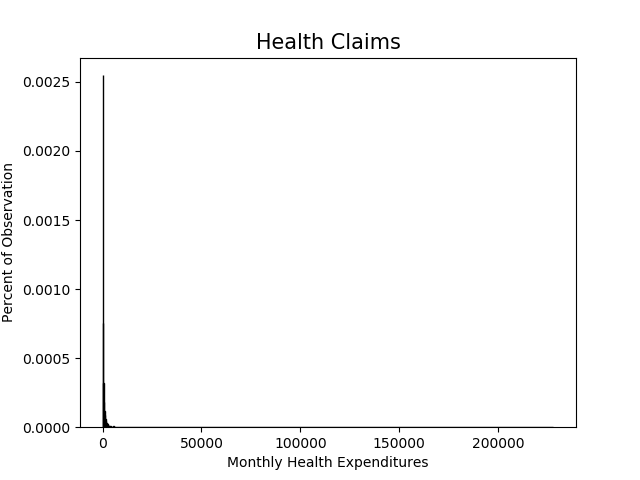

Text(0, 0.5, 'Percent of Observation')

In [7]:
#Histogram 1
%matplotlib notebook

num_bins = 1000
count, bins, ignored = plt.hist(data, num_bins, density=True, edgecolor='k')
plt.title('Health Claims', fontsize=15)
plt.xlabel(r'Monthly Health Expenditures')
plt.ylabel(r'Percent of Observation')

<IPython.core.display.Javascript object>


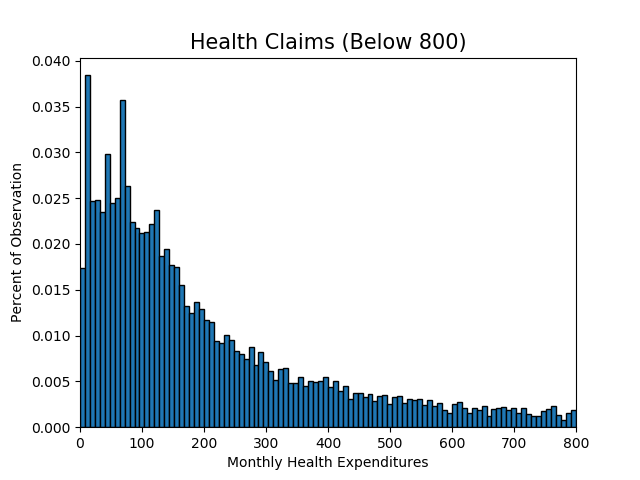

(0, 800)

In [8]:
#Histogram 2
%matplotlib notebook

num_bins = 100
data_b800 = data[data <= 800] #We consider only the data below or equal to 800
peso = (1/len(data))*np.ones_like(data_b800) #Adjusting the frequencies to account for the observations not displayed
                                      
count, bins, ignored = plt.hist(data_b800, num_bins, weights=peso, edgecolor='k')
plt.title('Health Claims (Below 800)', fontsize=15)
plt.xlabel(r'Monthly Health Expenditures')
plt.ylabel(r'Percent of Observation')
plt.xlim([0, 800]) 

Question 2a:

In [9]:
# Define function that generates values of gamma pdf:
def gamma_pdf(xvals, alfa, beta):
    pdf_vals=xvals**(alfa-1)*np.exp(-xvals/beta)*1/(spc.gamma(alfa)*beta**(alfa))
    return pdf_vals

# Define log likelihood function for the gamma distribution:
def log_lik_gamma(xvals, alfa, beta):
    pdf_vals = gamma_pdf(xvals, alfa, beta)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    
    return log_lik_val

In [10]:
#Criterion function
def crit(params, args):
    alfa, beta = params
    xvals = args
    log_lik_val = log_lik_gamma(xvals, alfa, beta)
    neg_log_lik_val = -log_lik_val
    
    return neg_log_lik_val

In [12]:
#MLE estimation of parameters:
import scipy.optimize as opt

beta_init = Std_Dev**2/Mean 
alfa_init = Mean/beta_init  

params_init = np.array([alfa_init, beta_init])
mle_args = data

#The Nelder-Mead method is the one that resembles better the MLE estimates of the data.
results_cstr = opt.minimize(crit, params_init, args=(mle_args), method='Nelder-Mead', bounds=((1e-10, None), (1e-10, None)))
alfa_MLE, beta_MLE = results_cstr.x

log_lik_val = log_lik_gamma(data, alfa_MLE, beta_MLE)

print('alfa_MLE=', alfa_MLE)
print('beta_MLE=', beta_MLE)
print('Log-likelihood Gama Distribution=', log_lik_val)

alfa_MLE= 0.4725130059019564
beta_MLE= 1524.3558730482632
Log-likelihood Gama Distribution= -77723.47342496573


C:\Anaconda3\lib\site-packages\scipy\optimize\_minimize.py:518: RuntimeWarning: Method Nelder-Mead cannot handle constraints nor bounds.
  RuntimeWarning)
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


<IPython.core.display.Javascript object>


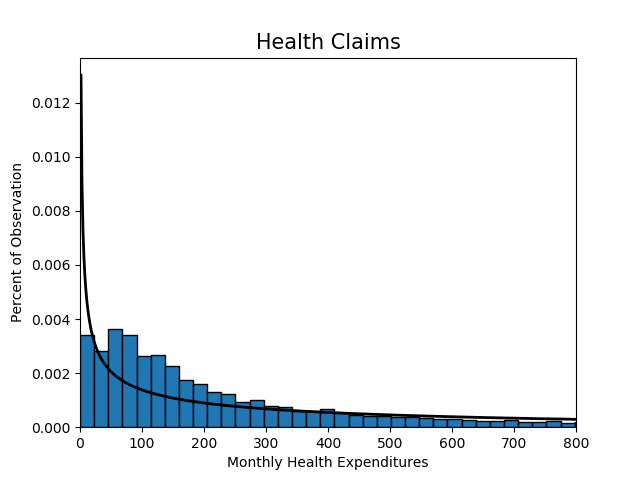

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
# Plotting the histogram of the data and the Gamma distrubution function:

%matplotlib notebook

num_bins = 10000
count, bins, ignored = plt.hist(data, num_bins, density=True, edgecolor='k')
plt.title('Health Claims', fontsize=15)
plt.xlabel(r'Monthly Health Expenditures')
plt.ylabel(r'Percent of Observation')
plt.xlim([0, 800]) 

#Plotting the ML estimated Gamma Distribution:
dist_data = np.linspace(0, 800, 500)
plt.plot(dist_data, gamma_pdf(dist_data, alfa_MLE, beta_MLE), linewidth=2, color='k')
plt.savefig('MLE_Gamma.png')

Question 2c

In [14]:
# Define function that generates values of generalized gamma pdf:
def gg_gamma_pdf(xvals, alfa, beta, m):
    pdf_vals_GG=xvals**(alfa-1)*np.exp(-xvals/beta)**m*m/(spc.gamma(alfa/m)*beta**(alfa))
    return pdf_vals_GG

# Define log likelihood function for the generalized gamma distribution:
def log_lik_gg_gamma(xvals, alfa, beta, m):
    pdf_vals_GG = gg_gamma_pdf(xvals, alfa, beta, m)
    ln_pdf_vals_GG = np.log(pdf_vals_GG)
    log_lik_val_GG = ln_pdf_vals_GG.sum()
    
    return log_lik_val_GG

In [15]:
#Criterion function for GG_Gamma:
def crit1(params, args):
    alfa, beta, m = params
    xvals = args
    log_lik_val_GG = log_lik_gg_gamma(xvals, alfa, beta, m)
    neg_log_lik_val_GG = -log_lik_val_GG
    
    return neg_log_lik_val_GG

In [16]:
#MLE estimation of parameters:
import scipy.optimize as opt

alfa_GG_init = alfa_MLE  
beta_GG_init = beta_MLE
m_GG_init = 1

params_init1 = np.array([alfa_GG_init, beta_GG_init, m_GG_init])
mle_args = data

results_cstr1 = opt.minimize(crit1, params_init1, args=(mle_args), method='L-BFGS-B',bounds=((1e-2, None), (1e-2, None), (1e-2, None)))
alfa_GG_MLE, beta_GG_MLE, m_GG_MLE = results_cstr1.x

log_lik_val_GG = log_lik_gg_gamma(data, alfa_GG_MLE, beta_GG_MLE, m_GG_MLE)

print('alfa_GG_MLE=', alfa_GG_MLE)
print('beta_GG_MLE=', beta_GG_MLE)
print('m_GG_MLE=', m_GG_MLE)
print('Log-likelihood Generalized Gamma Distribution=', log_lik_val_GG)

alfa_GG_MLE= 0.3700056437162788
beta_GG_MLE= 1524.3557427535643
m_GG_MLE= 0.46732353120050363
Log-likelihood Generalized Gamma Distribution= -75865.19301324661


<IPython.core.display.Javascript object>


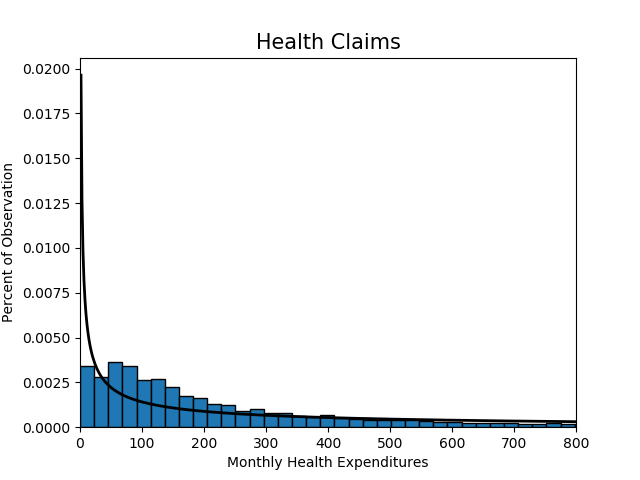

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
# Plotting the histogram of the data and the Gamma distrubution function:

%matplotlib notebook

num_bins = 10000
count, bins, ignored = plt.hist(data, num_bins, density=True, edgecolor='k')
plt.title('Health Claims', fontsize=15)
plt.xlabel(r'Monthly Health Expenditures')
plt.ylabel(r'Percent of Observation')
plt.xlim([0, 800]) 

#Plotting the ML estimated Gamma Distribution:
dist_data = np.linspace(0, 800, 500)
plt.plot(dist_data, gg_gamma_pdf(dist_data, alfa_GG_MLE, beta_GG_MLE, m_GG_MLE), linewidth=2, color='k')
plt.savefig('MLE_GeneralizedGamma.png')

Question 2d

In [18]:
# Define function that computes a beta distribution (we construct the function in terms of the gamma function):
#def beta_function(p,q):
#    beta_vals=spc.gamma(p)*spc.gamma(q)/spc.gamma(p+q)
#    return beta_vals

# Define function that generates values of generalized beta 2 pdf:
def gb_beta_pdf(xvals, a, b, p, q):
    num = a*(xvals**(a*p-1))
    den1 = b**(a*p)
    den2 = spc.beta(p,q)
    den3_aux = ((xvals/b)**a)+1
    den3 = den3_aux**(p+q)
    den = den1*den2*den3
    pdf_vals_GB=num/den
        
    return pdf_vals_GB

# Define log likelihood function for the generalized beta 2 distribution:
def log_lik_gb_beta(xvals, a, b, p, q):
    pdf_vals_GB = gb_beta_pdf(xvals, a, b, p, q)
    ln_pdf_vals_GB = np.log(pdf_vals_GB)
    log_lik_val_GB = ln_pdf_vals_GB.sum()
    
    return log_lik_val_GB

In [19]:
#Criterion function for generalized beta 2:
def crit2(params, args):
    a, b, p, q = params
    xvals = args
    log_lik_val_GB = log_lik_gb_beta(xvals, a, b, p, q)
    neg_log_lik_val_GB = -log_lik_val_GB
    
    return neg_log_lik_val_GB

In [20]:
#MLE estimation of parameters:
import scipy.optimize as opt

#We initialize the value of a, b, p, q according to the formula given in the MLTest Notebook
q_GB_init = 10000
a_GB_init = m_GG_MLE  
b_GB_init = (q_GB_init**m_GG_MLE)*beta_GG_MLE
p_GB_init = alfa_GG_MLE/m_GG_MLE
 

params_init2 = np.array([a_GB_init, b_GB_init, p_GB_init, q_GB_init])
mle_args = data

results_cstr2 = opt.minimize(crit2, params_init2, args=(mle_args), method='Nelder-Mead',bounds=((1e-10, None), (1e-10, None), (1e-2, None), (1e-2, None)))
a_GB_MLE, b_GB_MLE, p_GB_MLE, q_GB_MLE = results_cstr2.x

log_lik_val_GB = log_lik_gb_beta(data, a_GB_MLE, b_GB_MLE, p_GB_MLE, q_GB_MLE)

print('a_GB_MLE=', a_GB_MLE)
print('b_GB_MLE=', b_GB_MLE)
print('p_GB_MLE=', p_GB_MLE)
print('q_GB_MLE=', q_GB_MLE)
print('Log-likelihood Generalized Beta Distribution=', log_lik_val_GB)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in power
  if sys.path[0] == '':
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log
C:\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:563: RuntimeWarning: invalid value encountered in subtract
  numpy.max(numpy.abs(fsim[0] - fsim[1:])) <= fatol):
C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


a_GB_MLE= 0.46732353120050363
b_GB_MLE= 112818.535031308
p_GB_MLE= 0.791754788734422
q_GB_MLE= 10000.0
Log-likelihood Generalized Beta Distribution= -inf


<IPython.core.display.Javascript object>


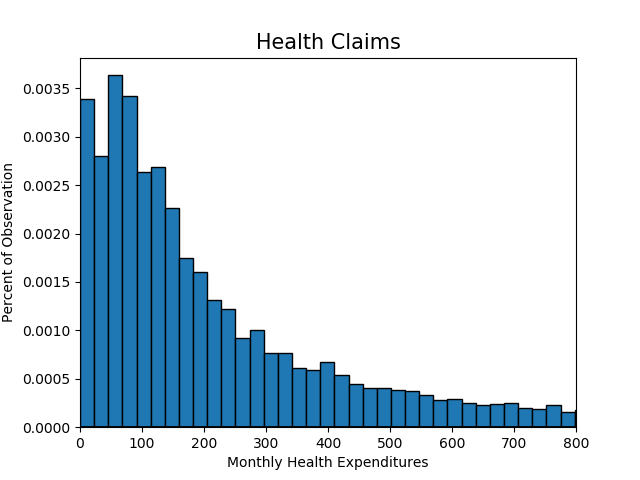

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in power
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in power
  if sys.path[0] == '':


In [21]:
# Plotting the histogram of the data and the Generalized Beta 2 distrubution function:

%matplotlib notebook

num_bins = 10000
count, bins, ignored = plt.hist(data, num_bins, density=True, edgecolor='k')
plt.title('Health Claims', fontsize=15)
plt.xlabel(r'Monthly Health Expenditures')
plt.ylabel(r'Percent of Observation')
plt.xlim([0, 800]) 

#Plotting the ML estimated Gamma Distribution:
dist_data = np.linspace(0, 800, 500)
plt.plot(dist_data, gb_beta_pdf(dist_data, a_GB_MLE, b_GB_MLE, p_GB_MLE, q_GB_MLE), linewidth=2, color='k')
plt.savefig('MLE_GeneralizedBeta2.png')

Question 2e

In [23]:
#LR Test for GG and GB2:

#I cannot print this result because I have a log-likelihood of -inf in the GB2 case, from parte (d)

log_lik_h0 = log_lik_gb_beta(data, a_GB_MLE, b_GB_MLE, p_GB_MLE, q_GB_MLE)  #The GB2 case (log-likelihood the null hypothesis)

log_lik_h1_GA = log_lik_gamma(data, alfa_MLE, beta_MLE)                     #The GA case (log-likelihood alternative hypothesis)
log_lik_h1_GG = log_lik_gg_gamma(data, alfa_GG_MLE, beta_GG_MLE, m_GG_MLE)  #The GG case (log-likelihood alternative hypothesis)

LR_val_1 = 2 * (log_lik_h1_GA - log_lik_h0)
pval_h0_GA = 1.0 - sts.chi2.cdf(LR_val_1, 4)
print('chi squared of Ho with 4 degrees of freedom p-value = ', pval_h0_GA)

LR_val_2 = 2 * (log_lik_h1_GG - log_lik_h0)
pval_h0_GG = 1.0 - sts.chi2.cdf(LR_val_2, 4)
print('chi squared of Ho with 4 degrees of freedom p-value = ', pval_h0_GG)

chi squared of Ho with 4 degrees of freedom p-value =  0.0
chi squared of Ho with 4 degrees of freedom p-value =  0.0


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in power
  if sys.path[0] == '':
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log


Question 2f

In [31]:
#To calculate a probability, we need to compute the area under the pdf until some point. 
#(To do that we use the integrate command)
import scipy.integrate as integrate
from scipy.integrate import quad

prob_GB = 1 - integrate.quad(lambda x: gb_beta_pdf(x, a_GB_MLE, b_GB_MLE, p_GB_MLE, q_GB_MLE), 0, 1000)[0]
print('Probability of having > 1000, according to Generalized Beta:', prob_GB)

prob_GA = 1 - integrate.quad(lambda x: gamma_pdf(x, alfa_MLE, beta_MLE), 0, 1000)[0]
print('Probability of having > 1000, according to Gamma:', prob_GA)

Probability of having >1000, according to Generalized Beta: 1.0
Probability of having >1000, according to Generalized Beta: 0.23677740568551497


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in double_scalars
  if sys.path[0] == '':
